# Linear Regression Practical Application

In [170]:
import pandas as pd 
import seaborn as sn 
import sklearn as sk 
import numpy as np

In [171]:
df = pd.read_csv('boston.csv')

In [172]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [173]:
#independent features and dependent features
X = df[['CRIM',	'ZN'	,'INDUS',	'CHAS'	,'NOX',	'RM',	'AGE',	'DIS',	'RAD'	,'TAX'	,'PTRATIO',	'B'	,'LSTAT']]
y = df['MEDV']

In [174]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [175]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


In [176]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [177]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [178]:
X_train = scaler.fit_transform(X_train)

In [179]:
Xtest = scaler.transform(X_test)

In [197]:
# we can also inverse tranform by
# scaler.inverse_transform(X_train)

In [180]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [198]:
regression = LinearRegression()
regression.fit(X,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [199]:
mse=cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv=10)

In [200]:
np.mean(mse)

np.float64(-25.550660791660793)

In [201]:
#prediction
reg_pred = regression.predict(X_test)

In [202]:
reg_pred

array([29.07194308, 36.10639164, 13.75908538, 24.55744957, 18.58215236,
       22.94545403, 17.61572573, 13.57141932, 22.97718032, 20.46870847,
       24.91525464, 18.92026211, -4.28131071, 21.26198266, 19.45123791,
       25.57824627, 20.56099819,  6.4519857 , 40.84555721, 17.5183465 ,
       27.20340972, 30.35192656, 11.45511759, 23.53334055, 18.12427476,
       16.39147632, 22.42817373, 15.28000133, 22.39251096, 19.10854144,
       22.97657219, 24.88682244, 25.30713064, 18.22846804, 16.94776851,
       17.28601894, 30.56759672, 20.16097176, 23.49428992, 24.04295712,
       14.01320787, 32.70905124, 43.18949844, 17.42153786, 27.1190194 ,
       17.21225183, 14.28275814, 25.20148859, 20.16719441, 30.00384338,
       21.58679568, 34.33123186, 15.83288129, 25.59413475, 39.31792393,
       22.22225914, 18.740485  , 33.43563311, 24.78456674, 13.39891261,
       22.55408869, 31.15264947, 31.23411512, 16.17801106, 20.54605423,
       17.00587718, 20.30445783, 26.03576297, 31.35762569, 12.68

C:\Users\usman electronics\AppData\Local\Temp\ipykernel_19576\1422041043.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reg_pred-y_test,kde =True)


<Axes: xlabel='MEDV', ylabel='Density'>

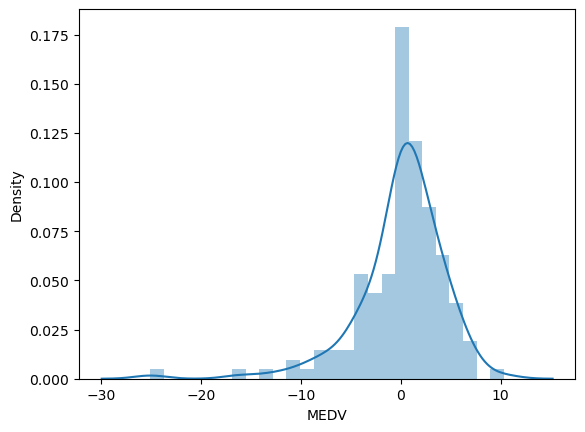

In [203]:
import seaborn as sns
sns.distplot(reg_pred-y_test,kde =True)

In [204]:
from sklearn.metrics import r2_score

In [205]:
score = r2_score(reg_pred,y_test)

In [206]:
score

0.6801969717177797